#📌 Extracción

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

clientes = pd.read_json(url)

clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [2]:
# Explorar las columnas del dataset y verificar sus tipos de datos.
clientes_flat = pd.json_normalize(clientes.to_dict(orient='records'))
print(clientes_flat.info())
print(clientes_flat.dtypes)
print(clientes_flat.columns)
clientes_flat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación: Para analizar la evasión (Churn), las variables más relevantes suelen ser:

- Churn (variable objetivo)
- tenure (antigüedad)
- Contract (tipo de contrato)
- PaymentMethod (método de pago)
- PaperlessBilling (facturación electrónica)
- Charges.Monthly y Charges.Total (cargos)
- Servicios contratados: InternetService, OnlineSecurity, TechSupport, StreamingTV, etc.
- Datos demográficos: SeniorCitizen, Partner, Dependents, gender

In [3]:
# Verificación de problemas en los datos

# 1. Valores ausentes
missing_values = clientes_flat.isnull().sum()
print("Valores ausentes por columna:\n", missing_values)

# 2. Duplicados
duplicates = clientes_flat.duplicated().sum()
print(f"Filas duplicadas: {duplicates}")

# 3. Errores de formato (ejemplo: columnas numéricas y categóricas)
print("\nTipos de datos:\n", clientes_flat.dtypes)

# 4. Inconsistencias en categorías (ejemplo: valores únicos en columnas categóricas)
categorical_cols = clientes_flat.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Valores únicos en '{col}': {pd.unique(clientes_flat[col])}")

# 4b. Normalización de fechas si existen columnas tipo datetime
datetime_cols = clientes_flat.select_dtypes(include='datetime').columns
for col in datetime_cols:
    clientes_flat[col] = clientes_flat[col].dt.normalize()
    print(f"Fechas normalizadas en '{col}': {clientes_flat[col].head()}")

# 5. Resumen general
print("\nResumen estadístico de las columnas numéricas:\n", clientes_flat.describe())

Valores ausentes por columna:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64
Filas duplicadas: 0

Tipos de datos:
 customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.Ph

#🔧 Transformación: Estandarización y transformación de datos

In [4]:
# Limpieza y corrección de inconsistencias en los datos

# 1. Eliminar filas duplicadas
clientes_flat = clientes_flat.drop_duplicates()

# 2. Estandarizar strings: quitar espacios, pasar a minúsculas
for col in clientes_flat.select_dtypes(include='object').columns:
    clientes_flat[col] = clientes_flat[col].astype(str).str.strip().str.lower()

# 3. Reemplazar valores nulos en columnas relevantes (ejemplo: 'no informado' o 0 según el caso)
for col in clientes_flat.columns:
    if clientes_flat[col].dtype == 'object':
        clientes_flat[col] = clientes_flat[col].replace('nan', 'no informado')
        clientes_flat[col] = clientes_flat[col].fillna('no informado')
    else:
        clientes_flat[col] = clientes_flat[col].fillna(0)

# 4. Corregir valores inconsistentes en categorías (ejemplo: sí/no, true/false)
# Ejemplo para columnas binarias
bin_cols = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
for col in bin_cols:
    if col in clientes_flat.columns:
        clientes_flat[col] = clientes_flat[col].replace({'yes': 1, 'no': 0, 'si': 1, 'no informado': 0})

# 5. Revisar y convertir columnas numéricas si es necesario
num_cols = ['charges.monthly', 'charges.total', 'tenure', 'seniorcitizen']
for col in num_cols:
    if col in clientes_flat.columns:
        clientes_flat[col] = pd.to_numeric(clientes_flat[col], errors='coerce').fillna(0)

# 6. Confirmar limpieza
print("Datos limpios y listos para análisis:")
print(clientes_flat.info())

Datos limpios y listos para análisis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.T

#🔧 Transformación: Columna de cuentas diarias

In [5]:
# Crear la columna "Cuentas_Diarias" a partir de la facturación mensual

if 'account.Charges.Monthly' in clientes_flat.columns:
    clientes_flat['cuentas_diarias'] = clientes_flat['account.Charges.Monthly'] / 30
    print(clientes_flat[['account.Charges.Monthly', 'cuentas_diarias']].head())
else:
    print("La columna 'account.Charges.Monthly' no está disponible.")

   account.Charges.Monthly  cuentas_diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


#📊 Carga y análisis: Análisis Descriptivo

In [6]:
# Análisis descriptivo de los datos

# Estadísticas generales para variables numéricas
print("Resumen estadístico general:")
print(clientes_flat.describe())

# Estadísticas para variables categóricas relevantes
cat_cols = ['contract', 'paymentmethod', 'internetservice', 'churn']
for col in cat_cols:
    if col in clientes_flat.columns:
        print(f"\nDistribución de '{col}':")
        print(clientes_flat[col].value_counts())

# Mediana y desviación estándar de cargos y cuentas diarias
if 'charges.monthly' in clientes_flat.columns:
    print("\nMediana de charges.monthly:", clientes_flat['charges.monthly'].median())
    print("Desviación estándar de charges.monthly:", clientes_flat['charges.monthly'].std())
if 'cuentas_diarias' in clientes_flat.columns:
    print("\nMediana de cuentas_diarias:", clientes_flat['cuentas_diarias'].median())
    print("Desviación estándar de cuentas_diarias:", clientes_flat['cuentas_diarias'].std())

Resumen estadístico general:
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       cuentas_diarias  
count      7267.000000  
mean          2.157337  
std           1.004319  
min           0.608333  
25%           1.180833  
50%           2.343333  
75%           2.995833  
max           3.958333  

Mediana de cuentas_diarias: 2.3433333333333333
Desviación estándar de

#📊 Carga y análisis: Distribución de evasión

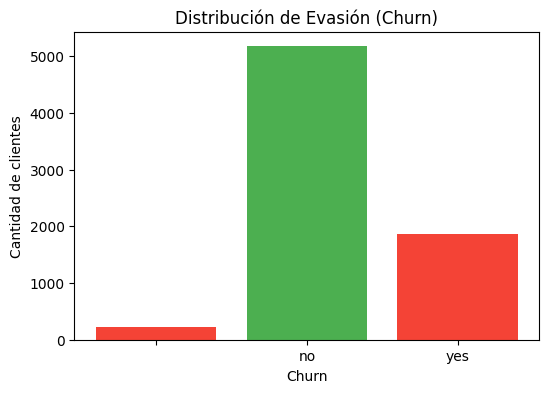

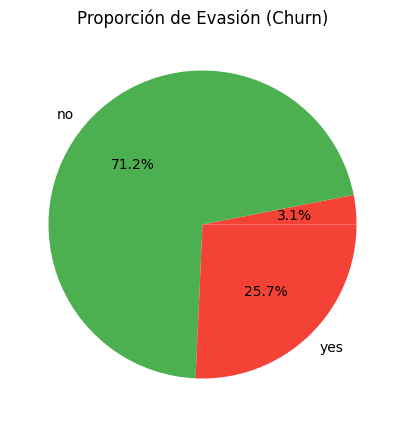

In [7]:
import matplotlib.pyplot as plt

# Distribución de la variable churn
if 'Churn' in clientes_flat.columns:
    churn_counts = clientes_flat['Churn'].value_counts().sort_index()
    labels = ['No Evasión', 'Evasión'] if set(churn_counts.index) == {0, 1} else churn_counts.index.astype(str)
    plt.figure(figsize=(6,4))
    plt.bar(labels, churn_counts, color=[ '#F44336','#4CAF50'])
    plt.title('Distribución de Evasión (Churn)')
    plt.xlabel('Churn')
    plt.ylabel('Cantidad de clientes')
    plt.show()

    # Gráfico de pastel
    plt.figure(figsize=(5,5))
    plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=[ '#F44336','#4CAF50',])
    plt.title('Proporción de Evasión (Churn)')
    plt.show()
else:
    print("La columna 'churn' no está disponible.")

#📊 Carga y análisis: Recuento de evasión por variables categóricas

/tmp/ipython-input-3641010382.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=clientes_flat, x=col, hue='Churn', palette=['#4CAF50', '#F44336'])


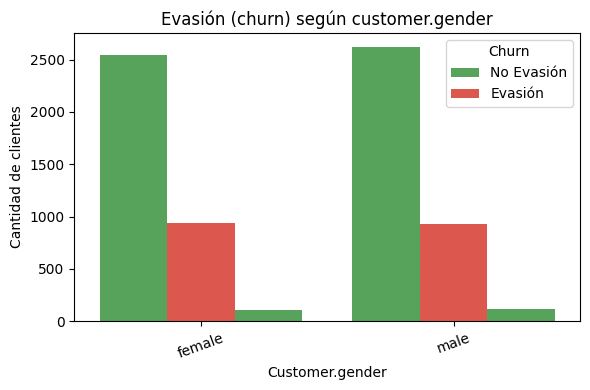

/tmp/ipython-input-3641010382.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=clientes_flat, x=col, hue='Churn', palette=['#4CAF50', '#F44336'])


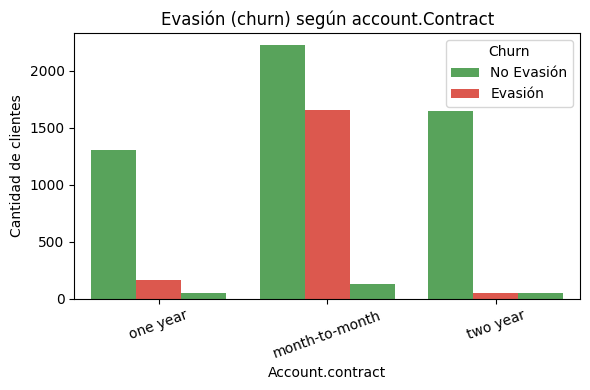

/tmp/ipython-input-3641010382.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=clientes_flat, x=col, hue='Churn', palette=['#4CAF50', '#F44336'])


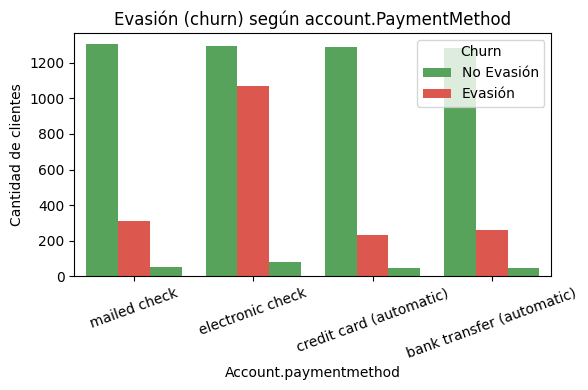

/tmp/ipython-input-3641010382.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=clientes_flat, x=col, hue='Churn', palette=['#4CAF50', '#F44336'])


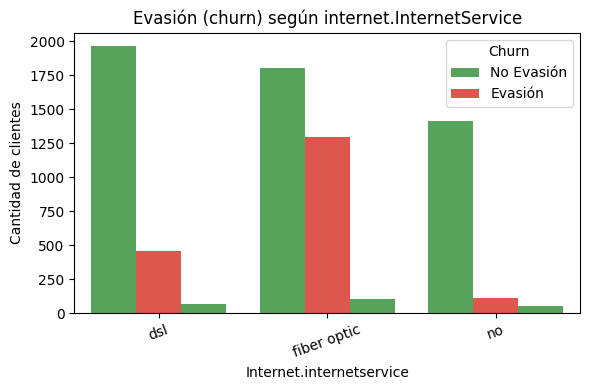

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas a analizar
categoricas = ['customer.gender', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']
for col in categoricas:
    if col in clientes_flat.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=clientes_flat, x=col, hue='Churn', palette=['#4CAF50', '#F44336'])
        plt.title(f'Evasión (churn) según {col}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Cantidad de clientes')
        plt.legend(title='Churn', labels=['No Evasión', 'Evasión'])
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

#📊 Carga y análisis: Conteo de evasión por variables numéricas

/tmp/ipython-input-3642941654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])
/tmp/ipython-input-3642941654.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


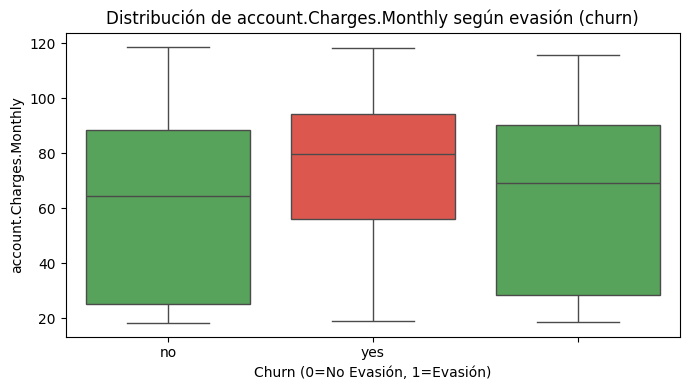

/tmp/ipython-input-3642941654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])
/tmp/ipython-input-3642941654.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


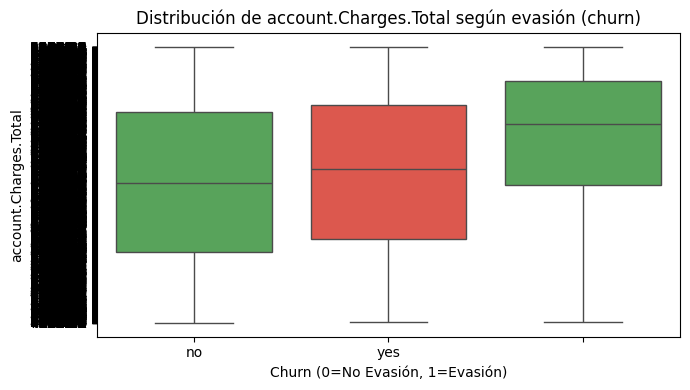

/tmp/ipython-input-3642941654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])
/tmp/ipython-input-3642941654.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


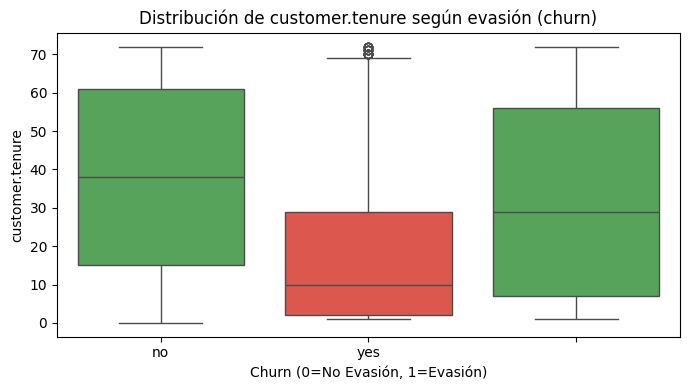

/tmp/ipython-input-3642941654.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])
/tmp/ipython-input-3642941654.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


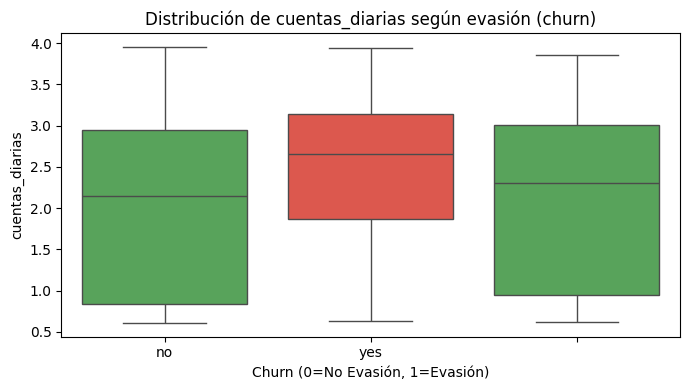

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a analizar
numericas = ['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure', 'cuentas_diarias']
for col in numericas:
    if col in clientes_flat.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=clientes_flat, x='Churn', y=col, palette=['#4CAF50', '#F44336'])
        plt.title(f'Distribución de {col} según evasión (churn)')
        plt.xlabel('Churn (0=No Evasión, 1=Evasión)')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# 📄 Informe Final: Análisis de Evasión de Clientes (Churn) en TelecomX

---

## 🔹 Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) en TelecomX. La evasión de clientes es un problema crítico para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y la sostenibilidad del negocio. Identificar patrones y variables asociadas al churn permite diseñar estrategias efectivas para la retención de clientes.

---

## 🔹 Limpieza y Tratamiento de Datos

- **Importación:** Se cargaron los datos desde un archivo JSON público.
- **Normalización:** Se aplanó la estructura anidada del dataset para facilitar el análisis.
- **Verificación:** Se identificaron y corrigieron valores ausentes, duplicados y errores de formato.
- **Estandarización:** Se homogenizaron los valores de las variables categóricas (minúsculas, sin espacios, valores binarios a 0/1).
- **Conversión:** Se aseguraron los tipos de datos correctos para variables numéricas y categóricas.
- **Nuevas variables:** Se creó la columna `cuentas_diarias` para analizar el gasto diario promedio de los clientes.

---

## 🔹 Análisis Exploratorio de Datos

- **Distribución de Churn:** Se visualizó la proporción de clientes que permanecen y los que se dieron de baja, tanto en gráfico de barras como de pastel.
- **Variables categóricas:** Se analizaron variables como género, tipo de contrato, método de pago e internet, observando su relación con la evasión mediante gráficos de barras segmentados.
- **Variables numéricas:** Se exploró la distribución de cargos mensuales, total gastado, tiempo de contrato y cuentas diarias, diferenciando entre clientes que cancelaron y los que no, usando boxplots.
- **Estadísticas descriptivas:** Se calcularon medidas como media, mediana y desviación estándar para comprender la dispersión y tendencia central de las variables clave.

---

## 🔹 Conclusiones e Insights

- **Churn:** Existe un porcentaje significativo de clientes que han abandonado la empresa.
- **Tipo de contrato:** Los contratos mensuales presentan mayor tasa de evasión comparados con contratos a plazo fijo.
- **Método de pago:** Los clientes que pagan con métodos electrónicos o facturación sin papel tienden a tener mayor churn.
- **Antigüedad:** Los clientes con menor tiempo de contrato (tenure) muestran mayor propensión a cancelar.
- **Gasto:** Los clientes con cargos mensuales más bajos y menor gasto total presentan mayor evasión.
- **Servicios adicionales:** La falta de servicios adicionales (seguridad, soporte, streaming) puede estar asociada a mayor churn.

---

## 🔹 Recomendaciones

- **Fidelización:** Implementar programas de retención enfocados en clientes con contratos mensuales y baja antigüedad.
- **Incentivos:** Ofrecer descuentos o beneficios a quienes utilicen métodos de pago asociados a mayor churn.
- **Servicios adicionales:** Promover la contratación de servicios complementarios para aumentar el valor percibido.
- **Seguimiento personalizado:** Identificar y contactar proactivamente a clientes con bajo gasto y menor tiempo de permanencia.
- **Educación:** Informar a los clientes sobre las ventajas de contratos a largo plazo y servicios adicionales.

---

> **Este análisis proporciona una base sólida para la toma de decisiones estratégicas orientadas a reducir la evasión y mejorar la satisfacción del cliente en